# CAP 5768 - Data Science - Dr. Marques - Fall 2019

# Assignment 1: The Python data science stack 
## Solutions

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
file = 'C:/Users/mkell/Dropbox/Fall 2019/Intro to Data Science/president_heights.csv'
presidents = pd.read_csv(file) 
presidents

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

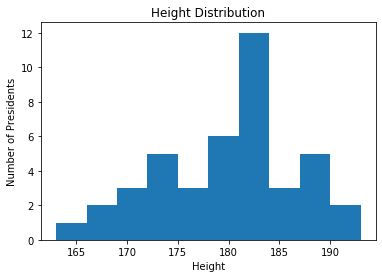

In [3]:
height = np.array(presidents['height(cm)'])
plt.hist(height)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Number of Presidents');

In [4]:
print("Height statistics")
print("Average height (global):", np.mean(height))
print("Standard Deviation of Height (global):", np.std(height))
print("Minimum height (global):", np.min(height))
print("Maximum height (global):", np.max(height))

Height statistics
Average height (global): 179.73809523809524
Standard Deviation of Height (global): 6.931843442745892
Minimum height (global): 163
Maximum height (global): 193


## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [5]:
print("Tallest preisdent(s): ")
for i in range(0, len(height)):
    if height[i]==np.max(height):
        print(str(presidents["order"][i]) + "    " +presidents["name"][i]) 


Tallest preisdent(s): 
16    Abraham Lincoln
36    Lyndon B. Johnson


In [6]:
print("Shortest preisdent(s): ")
for i in range(0, len(height)):
    if height[i]==np.min(height):
        print(str(presidents["order"][i]) + "    " +presidents["name"][i]) 

Shortest preisdent(s): 
4    James Madison


In [7]:
height_in_ft=height/30.48

print("Number of Presidents over 6 feet tall: ", len([x for x in height_in_ft if x>=6]))
height

Number of Presidents over 6 feet tall:  18


array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

## Solution

In [8]:
odd_height=height[0::2]
even_height=height[1::2]

if np.mean(even_height)>np.mean(odd_height):
    H1=True
else:
    H1=False
    
H1

False

## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

Hypothesis H1 was refuted.

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

H2: The first 22 presidents are, on average, shorter than the last 22.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [9]:
first_22=height[0:21:1]
last_22=height[22:43:1]

if np.mean(first_22)<np.mean(last_22):
    H2=True
else:
    H2=False
    
H2

True

Hypothesis H2 was confirmed by the data. 

-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [10]:
salaries = pd.read_csv('C:/Users/mkell/Dropbox/Fall 2019/Intro to Data Science/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

earn= employee salary

height= employee height

sex= employee sex

ed= years of employee education

age= employee age

race= employee race

--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [11]:
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


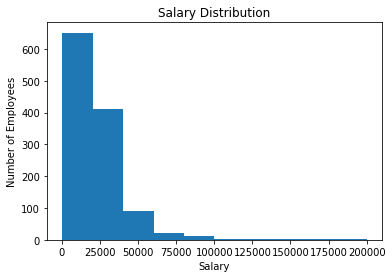

In [12]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

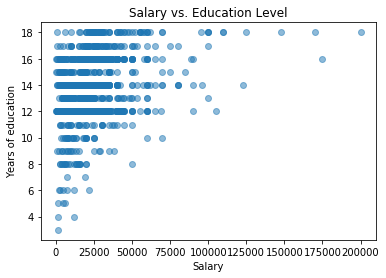

In [13]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary, years, alpha=0.5)
plt.show()

In [14]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894845


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

In [15]:
genders=np.array(salaries['sex'])

males=[]
females=[]

for g in genders:
    if g=='male':
        males.append(g)
    else:
        females.append(g)

males=np.array(males)
females=np.array(females)

total_headcount=len(males)+len(females)
print("number of males:", len(males), (len(males)/total_headcount)*100)
print("number of females:", len(females), (len(females)/total_headcount)*100)


number of males: 505 42.36577181208054
number of females: 687 57.63422818791947


In [16]:
male_salaries=[]
female_salaries=[]

for i in range(0, len(salaries)):
    if salaries['sex'][i]=='male':
        male_salaries.append(salaries['earn'][i])
    else:
        female_salaries.append(salaries['earn'][i])

male_salaries=np.array(male_salaries)
female_salaries=np.array(female_salaries)

print("Salary statistics per gender:")
print("Minimum salary (male):", np.min(male_salaries))
print("Maximum salary (male):", np.max(male_salaries))
print("Average salary (male):", np.mean(male_salaries))
print("Median  salary (male):", np.median(male_salaries))

print("Minimum salary (female):", np.min(female_salaries))
print("Maximum salary (female):", np.max(female_salaries))
print("Average salary (female):", np.mean(female_salaries))
print("Median  salary (female):", np.median(female_salaries))

Salary statistics per gender:
Minimum salary (male): 1000.0
Maximum salary (male): 200000.0
Average salary (male): 29786.130693069306
Median  salary (male): 25000.0
Minimum salary (female): 200.0
Maximum salary (female): 123000.0
Average salary (female): 18280.195050946142
Median  salary (female): 15000.0


Text(0.5, 0.98, '')

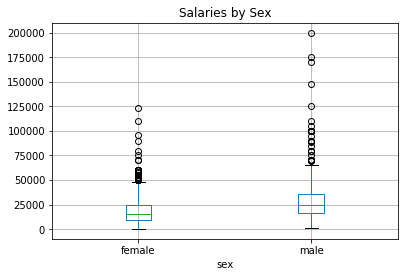

In [17]:
salaries.boxplot(column='earn', by='sex')
plt.title("Salaries by Sex")
plt.suptitle('')

It is clear from the dual boxplot above that the male group generally earns significantly more than the female group.

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

H3: Older employees (65 and older) make less on average than younger ones.

H4: Non-white employees make less on average than white employees.

H5: Shorter employees make less on average than taller ones.

## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

True


Text(0, 0.5, 'Salary')

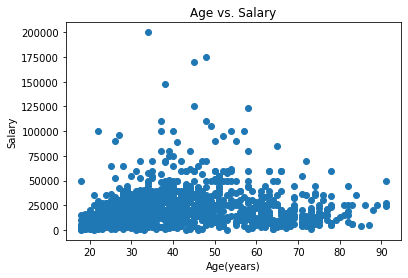

In [18]:
young_salaries=[]
older_salaries=[]

for i in range(0, len(salaries)):
    if salaries['age'][i]<65:
        young_salaries.append(salaries['earn'][i])
    else:
        older_salaries.append(salaries['earn'][i])

young_salaries=np.array(young_salaries)
older_salaries=np.array(older_salaries)

if np.mean(older_salaries)<np.mean(young_salaries):
    H3=True
else:
    H3=False

print(H3)

plt.scatter(salaries['age'], salaries['earn'])
plt.title("Age vs. Salary")
plt.xlabel("Age(years)")
plt.ylabel("Salary")

Hypothesis H3 was confirmed. Senior employees (65 and older) make less on average than younger employees. However, examining the scatter plot above reveals that much of the lower paid employees are actually more on the younger side of the age range of this dataset, with the highest paying jobs concentrated around the middle. This makes intuitive sense as middle aged employees are often in the prime of their career.

True


Text(0.5, 0.98, '')

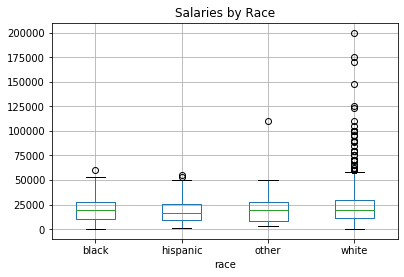

In [19]:
white_salaries=[]
nwhite_salaries=[]

for i in range(0, len(salaries)):
    if salaries['race'][i]=='white':
        white_salaries.append(salaries['earn'][i])
    else:
        nwhite_salaries.append(salaries['earn'][i])

white_salaries=np.array(white_salaries)
nwhite_salaries=np.array(nwhite_salaries)

if np.mean(nwhite_salaries)<np.mean(white_salaries):
    H4=True
else:
    H4=False

print(H4)

salaries.boxplot(column='earn', by='race')
plt.title("Salaries by Race")
plt.suptitle('')

Hypothesis H4 was confirmed. Nonwhite employees make less on average than white employees. In addition, it is clear from the boxplots above that there is an inherent salary bias towards white employees in this company. Although there are much fewer non-white employees in this company, their salaries come nowhere near those of white employees. 

True


Text(0, 0.5, 'Salary')

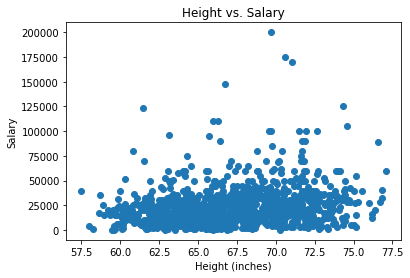

In [20]:
short_salaries=[]
tall_salaries=[]

for i in range(0, len(salaries)):
    if salaries['height'][i]<66:
        short_salaries.append(salaries['earn'][i])
    else:
        tall_salaries.append(salaries['earn'][i])

short_salaries=np.array(short_salaries)
tall_salaries=np.array(tall_salaries)

if np.mean(short_salaries)<np.mean(tall_salaries):
    H5=True
else:
    H5=False

print(H5)

plt.scatter(salaries['height'], salaries['earn'])
plt.title("Height vs. Salary")
plt.xlabel("Height (inches)")
plt.ylabel("Salary")

Hypothesis H5 was confirmed. On average, shorter employees (shorter than 66 inches) make less than taller ones. In addition, an examination of the scatter plot above reveals that the highest paid employees are near the median value for height.

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [21]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [22]:
data.dropna(inplace=True)
data.head()
data.reset_index(drop=True, inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

This line of code removed all the missing values from the data frame and saved the resulting data frame into the same variable, data.

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [23]:
cylinder_values=np.array(data['cylinders'])
cylinder_count=0

for i in range(0, len(cylinder_values)):
    if cylinder_values[i]==3.0 or cylinder_values[i]==5.0:
        cylinder_count=cylinder_count+1

print("Number of 3 and 5-cylinder vehicles: ", cylinder_count)

data=data.drop(data[(data.cylinders ==3.0) | (data.cylinders ==5.0)].index)
data

Number of 3 and 5-cylinder vehicles:  7


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [24]:
fuel_consumption=np.array(data['mpg'])

fuel_max=np.max(fuel_consumption)
fuel_min=np.min(fuel_consumption)
fuel_avg=np.mean(fuel_consumption)

print("Maximum mpg: ", fuel_max)
print("Minimum mpg: ", fuel_min)
print("Average mpg: ", fuel_avg)

Maximum mpg:  46.6
Minimum mpg:  9.0
Average mpg:  23.445454545454545


In [25]:
print("Most fuel efficient vehicle(s): ")
for i in range(0, len(fuel_consumption)):
    if fuel_consumption[i]==np.max(fuel_consumption):
        print(data['car_name'][i]+ "\n") 

print("Least fuel efficient vehicle(s): ")
for i in range(0, len(fuel_consumption)):
    if fuel_consumption[i]==np.min(fuel_consumption):
        print(data['car_name'][i]+ "\n") 


Most fuel efficient vehicle(s): 
audi 4000

Least fuel efficient vehicle(s): 
hi 1200d



--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

Text(0, 0.5, 'Displacement')

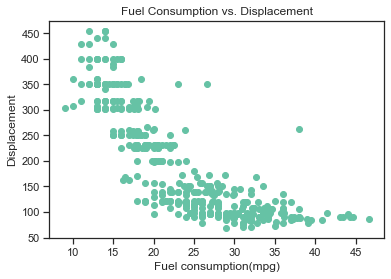

In [26]:
plt.scatter(data['mpg'], data['displacement'])
plt.title("Fuel Consumption vs. Displacement")
plt.xlabel("Fuel consumption(mpg)")
plt.ylabel("Displacement")

Text(0, 0.5, 'Weight')

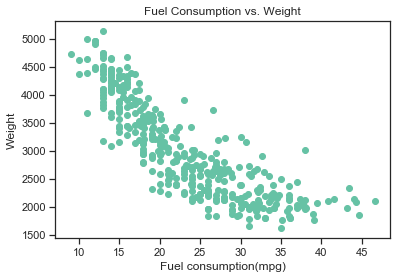

In [27]:
plt.scatter(data['mpg'], data['weight'])
plt.title("Fuel Consumption vs. Weight")
plt.xlabel("Fuel consumption(mpg)")
plt.ylabel("Weight")

Text(0, 0.5, 'Horsepower')

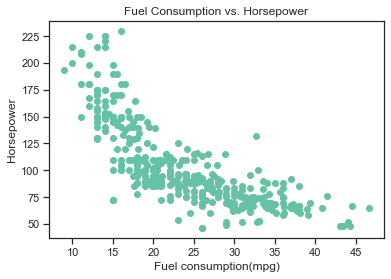

In [28]:
plt.scatter(data['mpg'], data['horsepower'])
plt.title("Fuel Consumption vs. Horsepower")
plt.xlabel("Fuel consumption(mpg)")
plt.ylabel("Horsepower")

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?



## Solution

There is a negative correlation between mpg and displacement. It appears to be linear. 

There is a negative correlation between mpg and weight. It appears to be non-linear. 

There is a negative correlation between mpg and horsepower. It appears to be non-linear.

## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

Text(0, 0.5, 'Fuel consumption(mpg)')

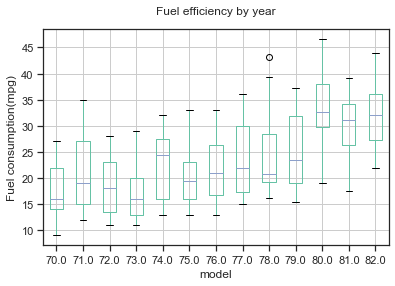

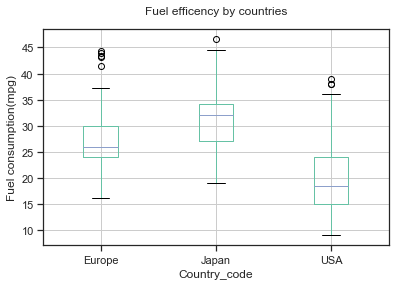

In [29]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data.boxplot(column='mpg', by='model')
plt.title('')
plt.suptitle("Fuel efficiency by year")
plt.ylabel("Fuel consumption(mpg)")

data.boxplot(column='mpg', by='Country_code')
plt.title('')
plt.suptitle("Fuel efficency by countries")
plt.ylabel("Fuel consumption(mpg)")

The two boxplots above show that there is a genereal trend of increasing fuel efficiency as time moves forward. 

In addition, it is evident that Japanese cars are generally more fuel efficient than American cars.

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. This assignment taught me how to produce summary statistics in Python for a dataset in order to produce mean, median, min and max values. It also showed me how to look at specific subsets of a dataset to test certain hypothesis about a dataset. Finally, it taught me which plots are best to visualize a dataset, depending on the questions we wish to answer.

2. The most enlightening part for me was discovering the ease of creating boxplots with pandas as opposed to matplotlib. The most time-consuming part was figuring out how to correctly use the drop() function for a Python dataframe to discard unwanted entries.

3. If I had an additional week to work on this, I would investigate how to use pandas as opposed to matplotlib to accomplish many of the goals presented in this assignment. I believe it would also be useful for me ot invesigate a package called seaborn, which I have heard is another useful Python package for data science tasks.